## Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_7843/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Reading csv file and creating Pandas DataFrame
df = pd.read_csv("Data/credit_score.csv")
df

CUST_ID  INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0    C02COQEVYU   33269        0   532304            0.0000        16.0000   
1    C02OZKC0ZF   77158    91187   315648            1.1818         4.0909   
2    C03FHP2D0A   30917    21642   534864            0.7000        17.3000   
3    C03PVPPHOY   80657    64526   629125            0.8000         7.8000   
4    C04J69MUX0  149971  1172498  2399531            7.8182        16.0000   
..          ...     ...      ...      ...               ...            ...   
995  CZQHJC9HDH  328892  1465066  5501471            4.4546        16.7273   
996  CZRA4MLB0P   81404    88805   680837            1.0909         8.3637   
997  CZSOD1KVFX       0    42428    30760            3.2379         8.1889   
998  CZWC76UAUT   36011     8002   604181            0.2222        16.7777   
999  CZZV5B3SAL   44266   309859    44266            6.9999         1.0000   

     R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  ...  \
0            1.2000           1889           945      0.5003  ...   
1            3.4615           5818           111      0.0191  ...   
2           24.7142           1157           860      0.7433  ...   
3            9.7499           6857          3686      0.5376  ...   
4            2.0465           1978           322      0.1628  ...   
..              ...            ...           ...         ...  ...   
995          3.7551          16701         10132      0.6067  ...   
996          7.6667           5400          1936      0.3585  ...   
997          0.7250              0             0      0.8779  ...   
998         75.5037           1993          1271      0.6377  ...   
999          0.1429           1574          1264      0.8030  ...   

     R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  \
0                   0.0000              0.0625          High         1   
1                   0.7692              0.2222            No         1   
2                   1.4286              0.0578          High         1   
3                   1.2500              0.1282          High         1   
4                   0.1163              0.0568          High         1   
..                     ...                 ...           ...       ...   
995                 0.2041              0.0543          High         1   
996                 0.8333              0.1087            No         1   
997                 0.2500              0.3448            No         1   
998                 5.0002              0.0662            No         1   
999                 0.1587              1.1111            No         1   

     CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  \
0                  0             0                    0               0   
1                  0             0                    1               0   
2                  0             0                    1               0   
3                  0             0                    1               0   
4                  1             1                    1               1   
..               ...           ...                  ...             ...   
995                1             1                    1               1   
996                0             0                    1               0   
997                0             0                    1               0   
998                1             0                    1               0   
999                0             0                    1               0   

     CREDIT_SCORE  DEFAULT  
0             444        1  
1             625        0  
2             469        1  
3             559        0  
4             473        0  
..            ...      ...  
995           418        0  
996           589        1  
997           499        0  
998           507        0  
999           657        0  

[1000 rows x 87 columns]

## DATA analysis and preprocessing

In [3]:
# Main info about DataFrame
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 87 entries, CUST_ID to DEFAULT
dtypes: float64(51), int64(34), object(2)
memory usage: 679.8+ KB


In [4]:
# Main info about DataFrame and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

In [5]:
# Calculate the sum of missing values for each column

missing_values = df.isna()

sum_missing_values = missing_values.sum()

print(sum_missing_values)

CUST_ID                0
INCOME                 0
SAVINGS                0
DEBT                   0
R_SAVINGS_INCOME       0
                      ..
CAT_MORTGAGE           0
CAT_SAVINGS_ACCOUNT    0
CAT_DEPENDENTS         0
CREDIT_SCORE           0
DEFAULT                0
Length: 87, dtype: int64


In [6]:
# Calculate the sum of duplicate values

duplicates = df.duplicated()
sum_of_duplicates = duplicates.sum()

print("Sum of duplicates:", sum_of_duplicates)

Sum of duplicates: 0


In [7]:
# Dropping "DEFAULT" column
df = df.drop("DEFAULT", axis=1)

In [8]:
# Printing "CAT_GAMBLING" columns' unique values
df["CAT_GAMBLING"].unique()

array(['High', 'No', 'Low'], dtype=object)

In [9]:
# Labeling "CAT_GAMBLING" columns' values with {0, 1, 2}
df["CAT_GAMBLING"] = df["CAT_GAMBLING"].map({"No": 0, "Low": 1, "High":2})
df["CAT_GAMBLING"]

0      2
1      0
2      2
3      2
4      2
      ..
995    2
996    0
997    0
998    0
999    0
Name: CAT_GAMBLING, Length: 1000, dtype: int64

In [10]:
# Dropping "CUST_ID" column because of no needing it
df = df.drop("CUST_ID", axis=1)

In [11]:
# Printing numeric columns' mean values
df.mean(numeric_only=True)

INCOME                 121610.019000
SAVINGS                413189.597000
DEBT                   790718.045000
R_SAVINGS_INCOME            4.063477
R_DEBT_INCOME               6.068449
                           ...      
CAT_CREDIT_CARD             0.236000
CAT_MORTGAGE                0.173000
CAT_SAVINGS_ACCOUNT         0.993000
CAT_DEPENDENTS              0.150000
CREDIT_SCORE              586.712000
Length: 85, dtype: float64

In [12]:
test_100 = np.random.choice(1000, size=100, replace=False)

In [13]:
df_test_100 = df.iloc[test_100]
df_test_100.to_csv("Data/test_100.csv", index=False)

In [14]:
df.drop(test_100, axis=0, inplace=True)

In [15]:
df.to_csv("Data/cleaned_data.csv", index=False)

In [16]:
df = pd.read_csv("Data/cleaned_data.csv")
df

INCOME  SAVINGS     DEBT  R_SAVINGS_INCOME  R_DEBT_INCOME  \
0     33269        0   532304            0.0000        16.0000   
1     77158    91187   315648            1.1818         4.0909   
2     30917    21642   534864            0.7000        17.3000   
3     80657    64526   629125            0.8000         7.8000   
4    149971  1172498  2399531            7.8182        16.0000   
..      ...      ...      ...               ...            ...   
895   18830     2354   393068            0.1250        20.8746   
896  328892  1465066  5501471            4.4546        16.7273   
897   81404    88805   680837            1.0909         8.3637   
898       0    42428    30760            3.2379         8.1889   
899   36011     8002   604181            0.2222        16.7777   

     R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  \
0            1.2000           1889           945      0.5003   
1            3.4615           5818           111      0.0191   
2           24.7142           1157           860      0.7433   
3            9.7499           6857          3686      0.5376   
4            2.0465           1978           322      0.1628   
..              ...            ...           ...         ...   
895        166.9788           1282           592      0.4618   
896          3.7551          16701         10132      0.6067   
897          7.6667           5400          1936      0.3585   
898          0.7250              0             0      0.8779   
899         75.5037           1993          1271      0.6377   

     R_CLOTHING_INCOME  ...  R_EXPENDITURE_INCOME  R_EXPENDITURE_SAVINGS  \
0               0.0568  ...                1.0000                 0.0000   
1               0.0754  ...                0.9091                 0.7692   
2               0.0374  ...                1.0000                 1.4286   
3               0.0850  ...                1.0000                 1.2500   
4               0.0132  ...                0.9091                 0.1163   
..                 ...  ...                   ...                    ...   
895             0.0681  ...                1.2500                 9.9987   
896             0.0508  ...                0.9091                 0.2041   
897             0.0663  ...                0.9091                 0.8333   
898             0.0047  ...                1.0668                 0.2500   
899             0.0553  ...                1.1111                 5.0002   

     R_EXPENDITURE_DEBT  CAT_GAMBLING  CAT_DEBT  CAT_CREDIT_CARD  \
0                0.0625             2         1                0   
1                0.2222             0         1                0   
2                0.0578             2         1                0   
3                0.1282             2         1                0   
4                0.0568             2         1                1   
..                  ...           ...       ...              ...   
895              0.0599             0         1                0   
896              0.0543             2         1                1   
897              0.1087             0         1                0   
898              0.3448             0         1                0   
899              0.0662             0         1                1   

     CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  CREDIT_SCORE  
0               0                    0               0           444  
1               0                    1               0           625  
2               0                    1               0           469  
3               0                    1               0           559  
4               1                    1               1           473  
..            ...                  ...             ...           ...  
895             0                    1               0           411  
896             1                    1               1           418  
897             0                    1               0           589  
898

In [17]:
# Taking all feature columns
X = df.iloc[:,:-1]
X.shape

(900, 84)

In [18]:
# Taking target column
y = df.iloc[:, -1]
y.shape

(900,)

## Visualisation

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))

# Creating boxplot for the 'SAVINGS' column
sns.boxplot(x=df['INCOME'], color='skyblue')

# Adding title and labels to the plot
plt.title('Boxplot of Income')
plt.xlabel('Income')

# Displaying the plot
plt.show()

In [21]:
# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))

# Creating boxplot for the 'SAVINGS' column
sns.boxplot(x=df['SAVINGS'], color='skyblue')

# Adding title and labels to the plot
plt.title('Boxplot of Savings')
plt.xlabel('Savings')

# Displaying the plot
plt.show()

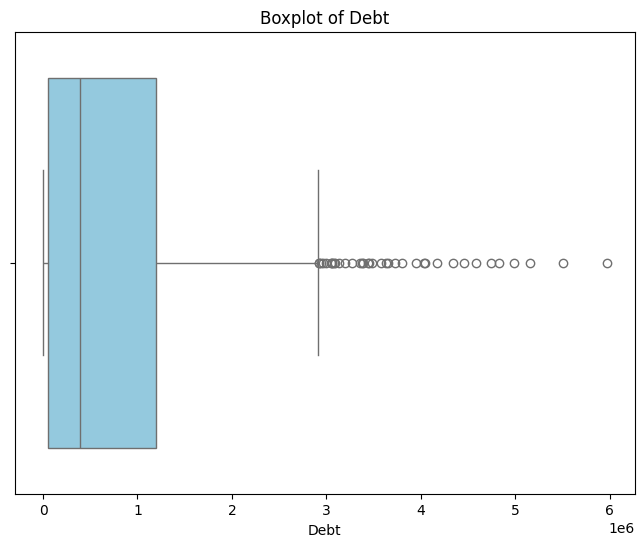

In [22]:
# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))

# Creating boxplot for the 'SAVINGS' column
sns.boxplot(x=df['DEBT'], color='skyblue')

# Adding title and labels to the plot
plt.title('Boxplot of Debt')
plt.xlabel('Debt')

# Displaying the plot
plt.show()

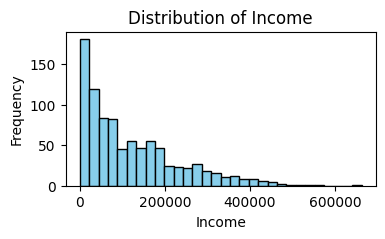

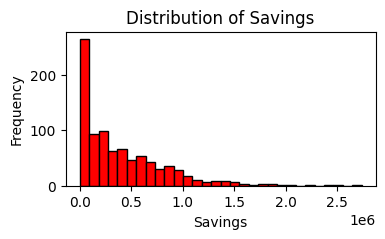

In [23]:
# Plotting the histogram for 'INCOME' column
plt.figure(figsize=(4, 2))
plt.hist(df['INCOME'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Plotting the histogram for 'SAVINGS' column
plt.figure(figsize=(4, 2))
plt.hist(df['SAVINGS'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of Savings')
plt.xlabel('Savings')
plt.ylabel('Frequency')
plt.show()

# Plotting the histogram for 'DEBT' column
plt.figure(figsize=(4, 2))
plt.hist(df['DEBT'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Debt')
plt.xlabel('Debt')
plt.ylabel('Frequency')
plt.show()


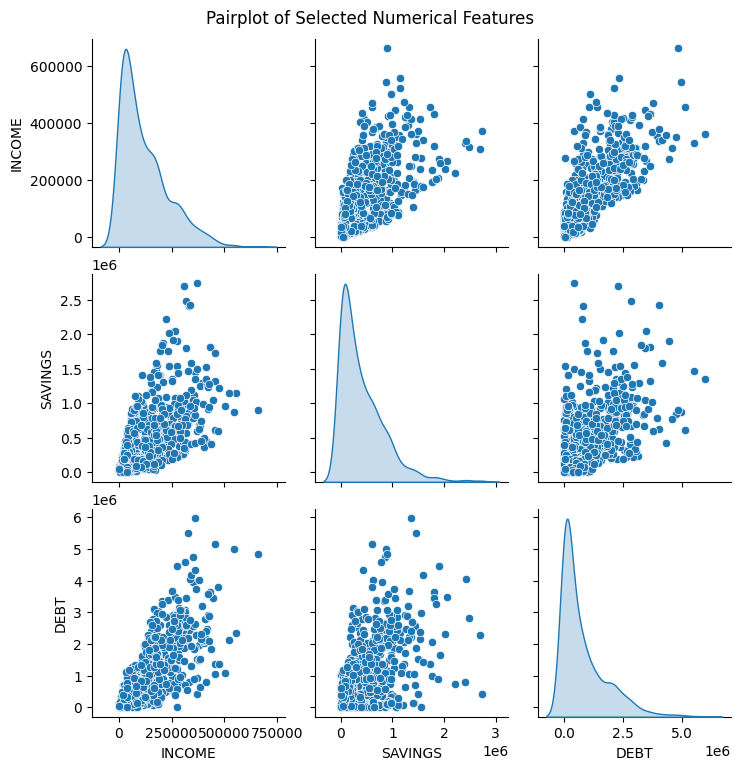

In [24]:
# Selecting features for the pairplot
selected_features = ['INCOME', 'SAVINGS', 'DEBT']

# Creating a pairplot with kernel density estimates on the diagonal
sns.pairplot(df[selected_features], diag_kind='kde')

# Adding a title to the plot
plt.suptitle('Pairplot of Selected Numerical Features', y=1.02)

# Displaying the plot
plt.show()

/tmp/ipykernel_7843/1412157007.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set3')
/tmp/ipykernel_7843/1412157007.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set3')
/tmp/ipykernel_7843/1412157007.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set3')
/tmp/ipykernel_7843/1412157007.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

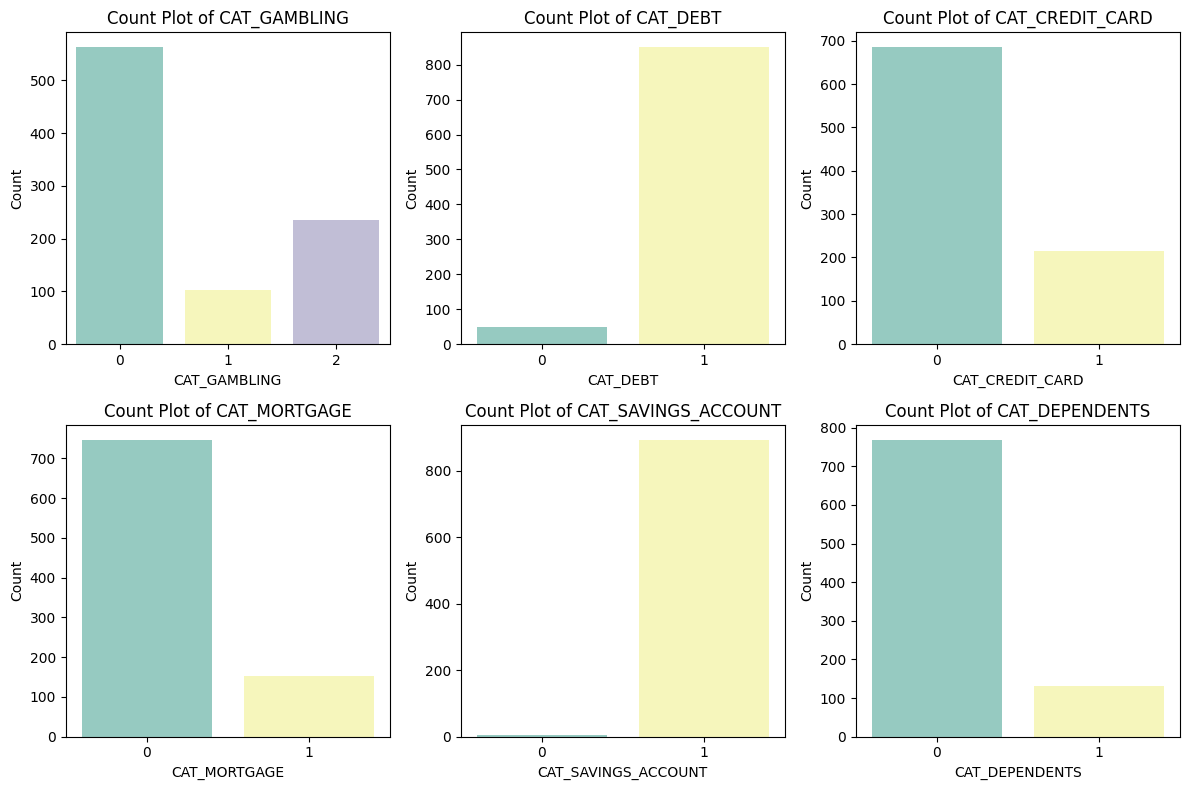

In [25]:
# List of categorical features
categorical_features = ['CAT_GAMBLING', 'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS']

# Setting the figure size
plt.figure(figsize=(12, 8))

# Looping over each categorical feature
for i, feature in enumerate(categorical_features, 1):
    # Creating subplots
    plt.subplot(2, 3, i)
    
    # Creating count plot for the current feature
    sns.countplot(x=feature, data=df, palette='Set3')
    
    # Adding title to the subplot
    plt.title(f'Count Plot of {feature}')
    
    # Adding labels to x and y axis
    plt.xlabel(feature)
    plt.ylabel('Count')

# Adjusting layout to prevent overlapping of subplots
plt.tight_layout()

# Displaying the plot
plt.show()


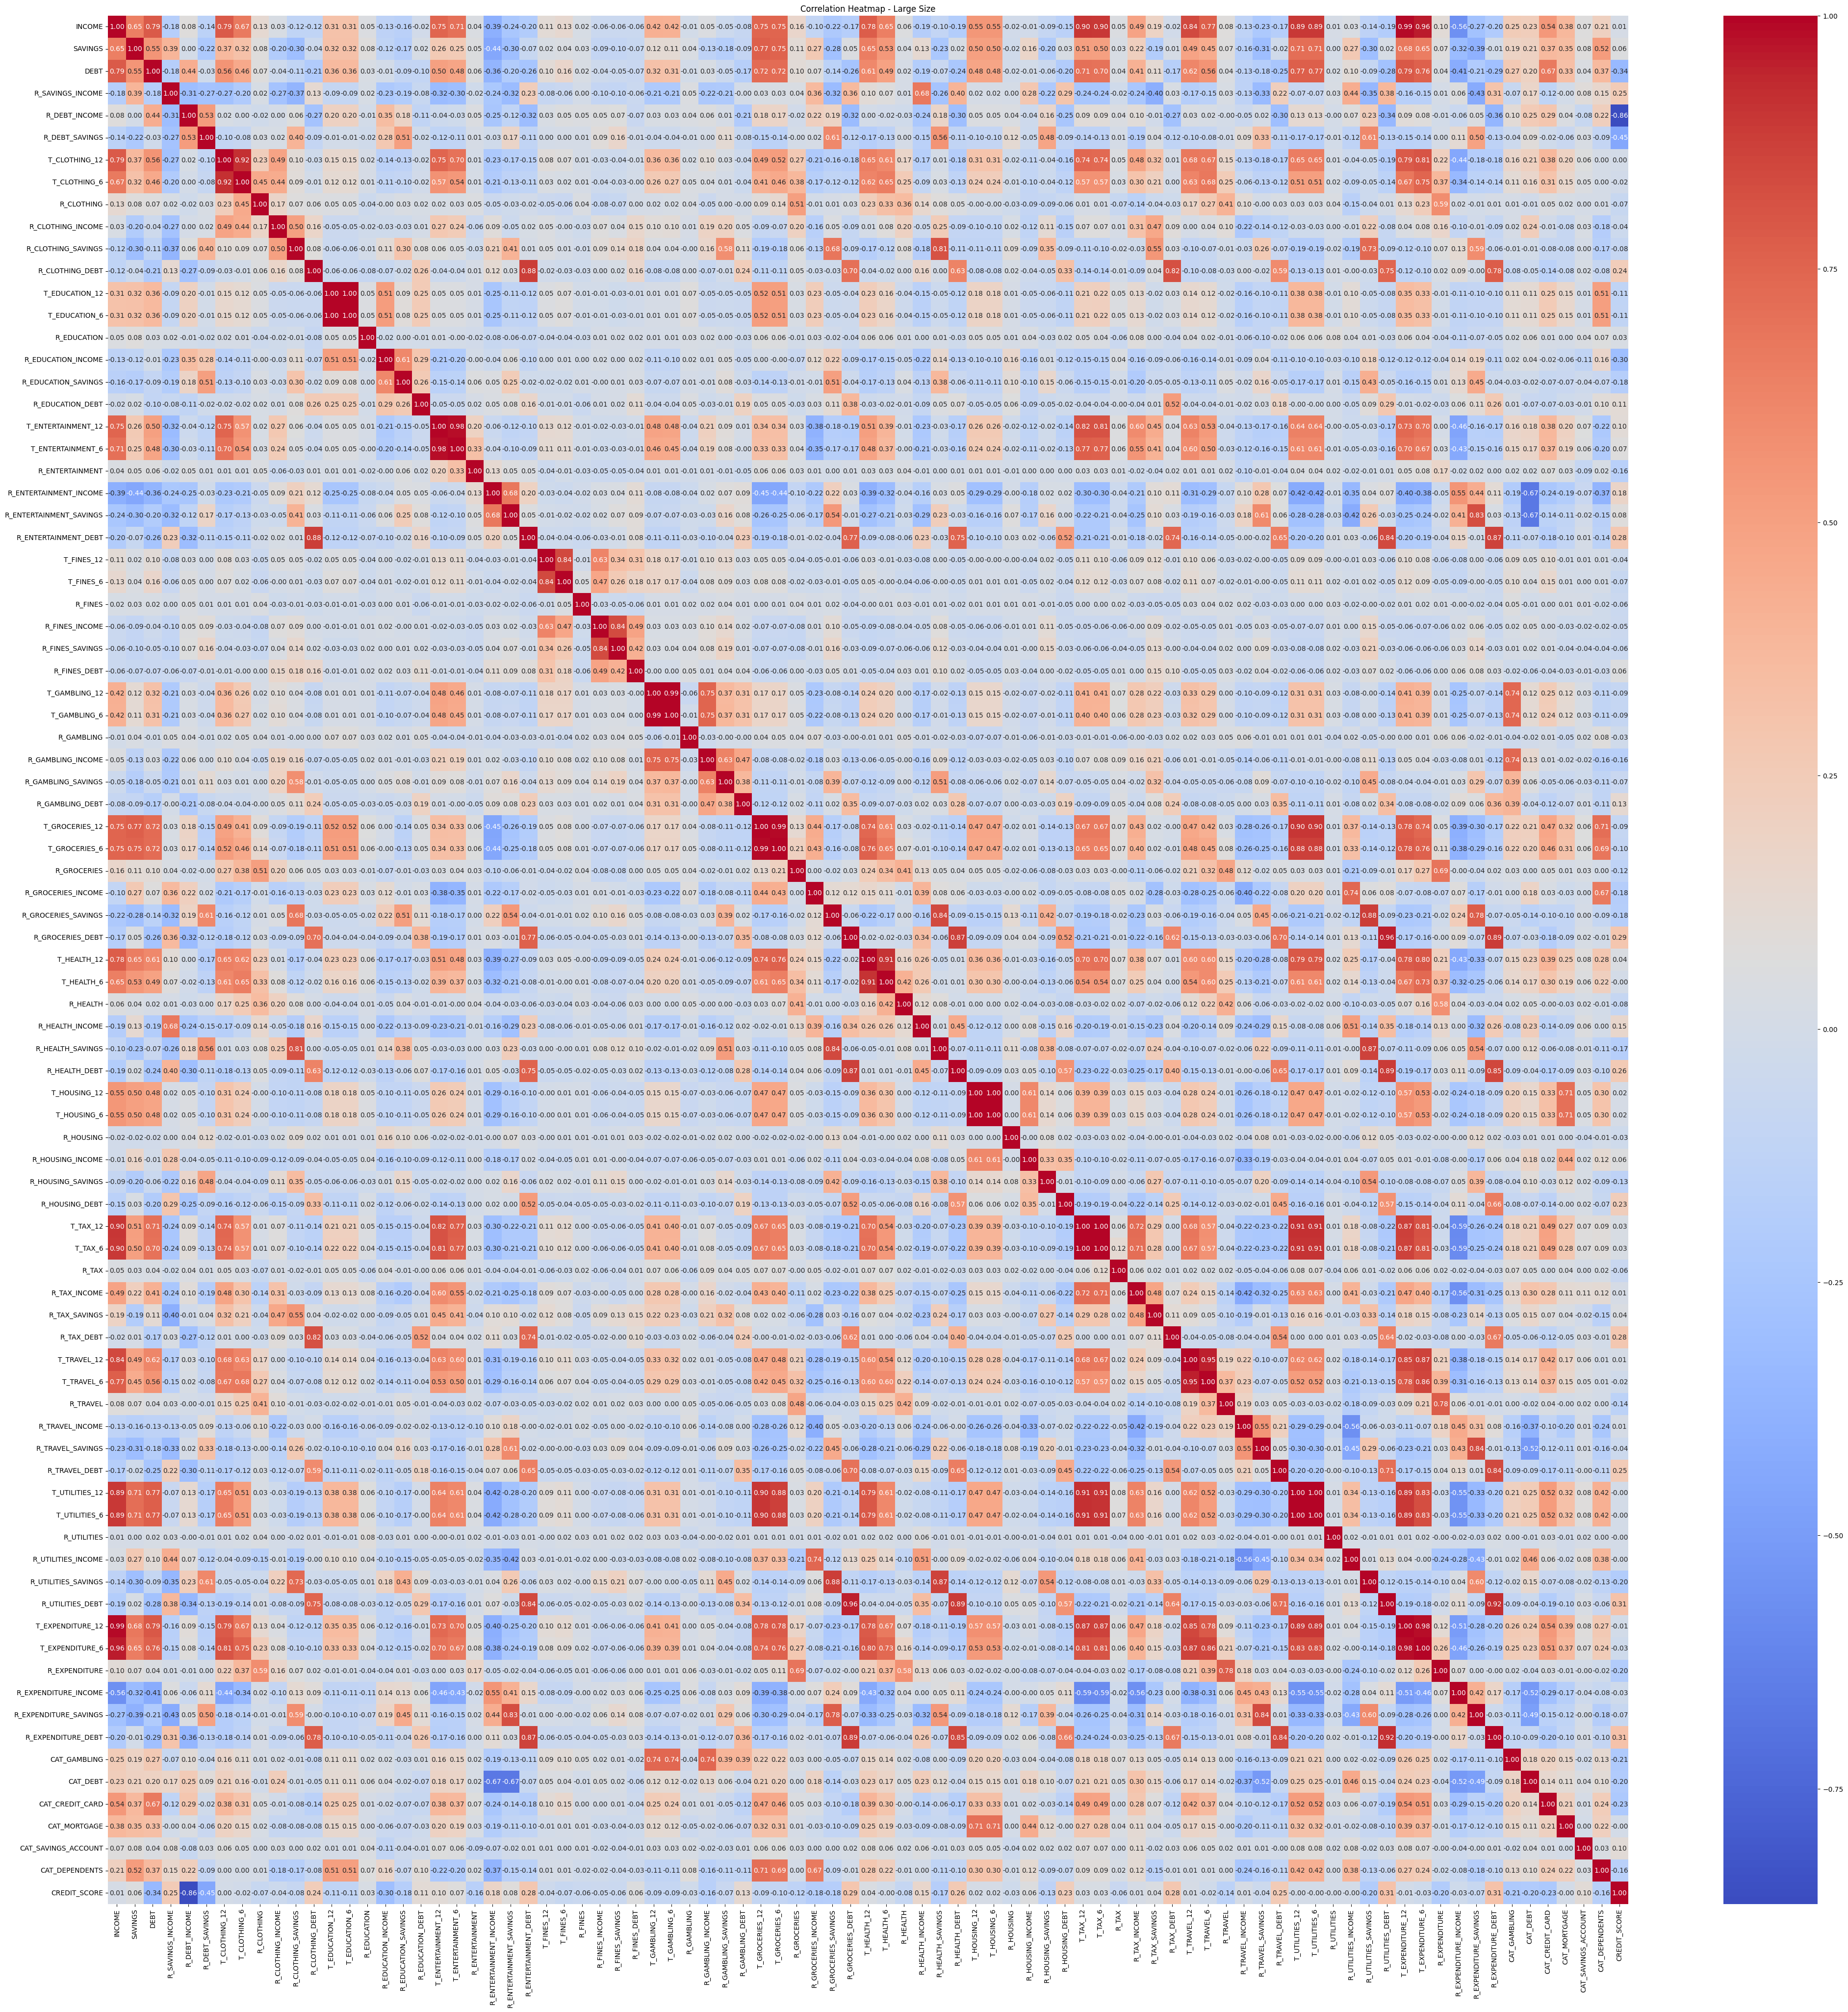

In [26]:
# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Set the size of the plot
plt.figure(figsize=(50, 50))

# Plot the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set title and show the plot
plt.title('Correlation Heatmap - Large Size')
plt.show()
